<center>
    <u><font size="36">Boundary Value Problems</font></u>
    <h3>∙ exploring solutions by first central & finite difference approximation ∙</h3>
    <h2>by Rebecca Hinrichs</h2>
    <h4>SPRING 2023</h4>
</center>

---
---

In [1]:
# Import numerical computation libraries
import math
import numpy as np
import scipy as sp
from scipy.integrate import solve_bvp

# Import graphic libraries
import matplotlib.pyplot as plt

# Set back-end display options
np.set_printoptions(precision = 4)

<center><br>Questions are from <b>Problem Set 8.2</b> in <br><i>Numerical Methods in Engineering with Python 3</i> by Jaan Kiusalaas</center>

---
<center><h2>Question 1</h2></center>

Use first central difference approximations to transform the boundary value problem shown into simultaneous equations $Ay=b$.
$$
\begin{align*}
y''=(2+x)y \\
y(0)=0 \\
y'(1)=5 \\
\end{align*}
$$
<br>

<center><hr style="width: 50%; border-color: black;"></center>
    
<center>The values of the numerical solution at mesh points $y_i, i = 0,1,...,m$ are approximated by:</center><br>

<center>$y''_i \approx \frac{y_{i+1}-2y_i+y_{i-1}}{h^2}$<br><br>
Converting our problem to a BVP where $y(a)=\alpha$ and $y(b)=\beta$, the problem becomes:</center><br>

<center>$\frac{y_{i+1}-2y_i+y_{i-1}}{h^2} = (2+x_i)y_i$<br><br>
Rearranged:<br>$y_{i+1} - 2 y_i + y_{i-1} = h^2 (2 + x_i) y_i$<br>
Giving us a $y_i$ coefficient of $-2 - h^2 (2 + x_i)$</center><br>

<center>Applying the boundary conditions:<br>
$x_0 = 0$ and $y_0 = 0$ for $y(0) = 0$<br>
$x_m = 1$ for $y'(1) = 5$ can be approximated using backward difference:</center>

<center>$y'(x_n) \approx \frac{y_m - y_{m-1}}{h} = 5$<br>
Rearranged:<br>$y_m = y_{m-1} + 5h$</center><br>

<center>Now for the interior points $i = 1,2,...,m-1$:<br>
$y_{i+1} + [- 2 - h^2 (2 + x_i)] y_i + y_{i-1} = 0$<br>
And at $x_m$:  $y_m - y_{m-1} = 5h$</center><br>

<center><hr style="width: 50%; border-color: black;"></center>

<center>Therefore, to transform these into simultaneous equations $Ay=b$:</center><br>

<center>$A$ has a main diagonal constructed by the equation:<br>
$-2 - h^2 (2 + x_i)$ as the coefficient of $y_i$<br>
and its upper and lower diagonals consist of the cofficients for $y_{i-1} = y_{i+1} = 1$</center><br>

<center>$b$ is constructed by the boundary conditions:<br>
$b_i = 0$ for $x_0$ and $b_m = 5h$ for $x_m$</center><br>

<center>The solution vector $y$ is found by evaluating the values at the grid points.</center>

<center><hr style="width: 50%; border-color: black;"></center>


Enter the number of mesh points ==>  10



The Matrix A is
 [[ 1.      0.      0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [ 1.     -2.0261  1.      0.      0.      0.      0.      0.      0.
   0.    ]
 [ 0.      1.     -2.0274  1.      0.      0.      0.      0.      0.
   0.    ]
 [ 0.      0.      1.     -2.0288  1.      0.      0.      0.      0.
   0.    ]
 [ 0.      0.      0.      1.     -2.0302  1.      0.      0.      0.
   0.    ]
 [ 0.      0.      0.      0.      1.     -2.0316  1.      0.      0.
   0.    ]
 [ 0.      0.      0.      0.      0.      1.     -2.0329  1.      0.
   0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.     -2.0343  1.
   0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.     -2.0357
   1.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   1.    ]]

The Right-hand side Vector b is
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.5556]

+ + + + + NUMERICAL SAMPLE SOLUTIONS + + + + + +
	  x       

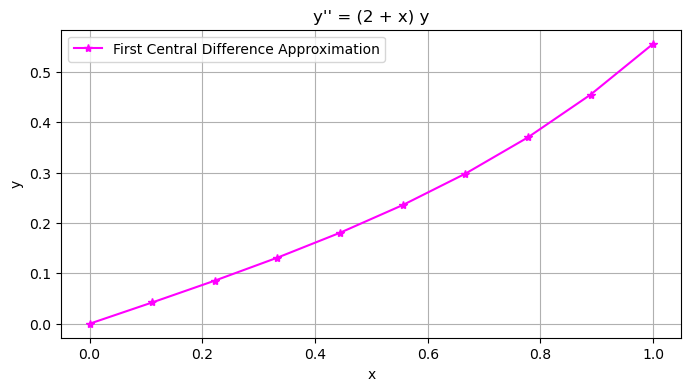

In [113]:
## LU-DECOMPOSITION METHOD FOR SOLVING BVP with ADAPTIVE GRIDSPACE
# Set up the mesh
m = eval(input("\nEnter the number of mesh points ==> "))
h = 1.0 / (m-1)
x = np.linspace(0, 1, m)

# Initialize the solution vector
y = np.zeros(m)

# Set up the matrix A and right-hand side vector b
A = np.zeros((m, m))
b = np.zeros(m)

# Discretize the equations
for i in range(1, m-1):
    A[i, i-1] = 1                     # y_{i-1}
    A[i, i] = -2 - h**2 * (2 + x[i])  # y_i
    A[i, i+1] = 1                     # y_{i+1}

# Boundary conditions
A[0, 0] = 1           # x_i
A[-1, -1] = 1         # x_m
b[-1] = 5 * h         # y

# Solve the system
y = np.linalg.solve(A, b)

# Print the Solution
print("\nThe Matrix A is\n", A)
print("\nThe Right-hand side Vector b is\n", b)
print()

## PRINT THE NUMERICAL SOLUTION
print("+ + + + + NUMERICAL SAMPLE SOLUTIONS + + + + + +")
print(f"\t{'x':>3}  {'y':>20}")
for i in range(0, m, max(1, m//20)):
    print(f"\t{x[i]:<20.5f}  {y[i]:<20.5f}")
print()

## PLOT THE SOLUTION
plt.figure(figsize=(8, 4))
plt.plot(x, y, '*-', label='First Central Difference Approximation', color='magenta')
plt.title('y\'\' = (2 + x) y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show();

---
<center><h2>Question 6</h2></center>

Solve the given boundary value problem with the finite difference method using $m=20$.
$$
\begin{align*}
y''= x y \\
y(1) = 1.5 \\
y(2) = 3 \\
\end{align*}
$$
<br><br>


Enter the number of mesh points ==>  20

+ + + + + + NUMERICAL SAMPLE SOLUTIONS + + + + + +
	    x   	      y 
	 1.00 		    1.5000
	 1.05 		    1.4955
	 1.10 		    1.4969
	 1.15 		    1.5045
	 1.20 		    1.5187
	 1.25 		    1.5397
	 1.30 		    1.5679
	 1.35 		    1.6037
	 1.40 		    1.6474
	 1.45 		    1.6996
	 1.50 		    1.7606
	 1.55 		    1.8311
	 1.60 		    1.9114
	 1.65 		    2.0024
	 1.70 		    2.1046
	 1.75 		    2.2187
	 1.80 		    2.3456
	 1.85 		    2.4862
	 1.90 		    2.6414
	 1.95 		    2.8123
	 2.00 		    3.0000



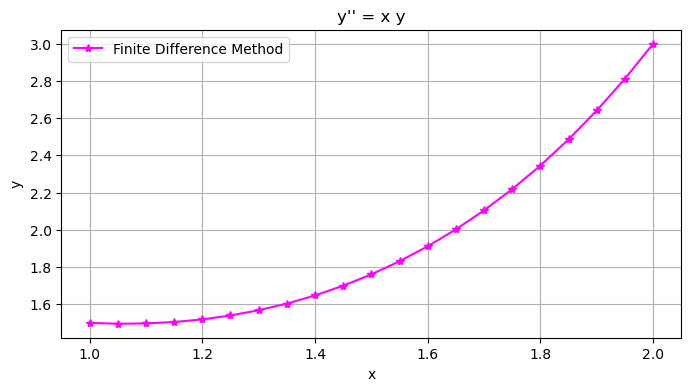

In [111]:
## LU-DECOMPOSITION METHOD FOR SOLVING BVP (LINEAR)
''' Gifted by Dr.Z & textbook; my modifications
'''
#
def LUdecomp3(c, d, e):
    n = len(d)
    for k in range(1, n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    return c, d, e
#
def LUsolve3(c, d, e, b):
    n = len(d)
    for k in range(1, n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2, -1, -1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b 
#
# Set up finite difference equations
def equations(x, h, m, f1, f2): 
   h2 = h*h
   c = np.zeros(m)
   d = np.zeros(m + 1)
   e = np.zeros(m)
   b = np.zeros(m + 1)
   
   for i in range(1, m+1): 
       c[i-1] = 1.0                # y_{i-1}
       d[i] = -2.0 - x[i] * h2     # y_i = y'' = -x_m
       e[i-1] = 1.0                # y_{i+1}
       b[i] = x[i] * h2            # right side
   
   d[0] = 1.0; e[0] = 0.0;   b[0] = f1  # y(1) = 1.5
   d[m] = 1.0; c[m-1] = 0.0; b[m] = f2  # y(2) = 3.0
   
   return c, d, e, b
#
def finite_differences(x0, f0, xm, fm, m):
    xStart = x0       # x at left end point, x = 1.0
    xEnd = xm         # x at right end point, x = 2.0
    #
    h = (xEnd - xStart)/ (m+1)
    x = np.linspace(xStart, xEnd, m + 1)
    #
    # for i in range(m + 1): x[i] = xStart + h*i
    #
    c,d,e,b = equations(x,h,m,f0,fm)
    #
    c, d, e = LUdecomp3(c, d, e)
    b = LUsolve3(c, d, e, b)
    #
    # Print Solution
    print("\n+ + + + + + NUMERICAL SAMPLE SOLUTIONS + + + + + +")
    print("\t", "   x  ", "\t", "     y ")
    for i in range(0, m+1, 1):
        print('\t{:5.2f}'.format(x[i]),'\t\t', '{:9.4f}'.format(b[i]))
    print()
    #
    # Plot Solution
    plt.figure(figsize=(8, 4))
    plt.plot(x, b, '*-', label='Finite Difference Method', color='magenta')
    plt.title('y\'\' = x y')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show();

## <<-- ANSWER THE QUESTION -->>
m = 20
print(f'\nEnter the number of mesh points ==>  {m}')
finite_differences(x0=1.0, f0=1.5,  # left boundary: f(1) = 1.5
                   xm=2.0, fm=3.0,  # right boundary: f(2) = 3
                   m=m)

---
<center><h2>Question 7</h2></center>

Solve the given boundary value problem with the finite difference method using $m=20$.
$$
\begin{align*}
y'' + 2y' + y = 0 \\
y(0) = 0 \\
y(1) = 1 \\
\end{align*}
$$
Exact solution is $y = x e^{1-x}$.
<br><br>


Enter the number of mesh points ==>  20

   x      |   Num Solution (sp)   |   Exact Solution
--------------------------------------------------------
 0.00               0.0000             0.0000
 0.05               0.1293             0.1293
 0.10               0.2460             0.2460
 0.15               0.3509             0.3509
 0.20               0.4451             0.4451
 0.25               0.5293             0.5293
 0.30               0.6041             0.6041
 0.35               0.6704             0.6704
 0.40               0.7288             0.7288
 0.45               0.7800             0.7800
 0.50               0.8244             0.8244
 0.55               0.8626             0.8626
 0.60               0.8951             0.8951
 0.65               0.9224             0.9224
 0.70               0.9449             0.9449
 0.75               0.9630             0.9630
 0.80               0.9771             0.9771
 0.85               0.9876             0.9876
 0.90               

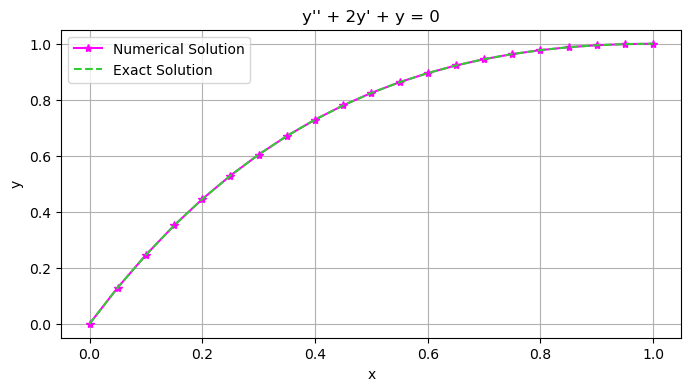

In [110]:
## SUBSTITUTION METHOD FOR USING `solve_bvp` GIVEN AN EXACT SOLUTION

# Set up the mesh
m = 20                         # number of mesh spaces
x = np.linspace(0.0, 1.0,      # a <= x <= b
                m+1)
y = np.zeros((2, x.size))      # solution vector holds y & y'
print(f'\nEnter the number of mesh points ==>  {m}')

# Discretize the differential equation
def fun(x,y): 
    dydx = y[1]                       # y' = y'
    dzdx = -y[0] - 2*y[1]             # y'' = -2y'-y
    return np.vstack([dydx, dzdx])    # rewriting y'' as y'

# Implement the boundary conditions
def bc(ya, yb): return np.array([ya[0] - 0.00,   # y(a) == α
                                 yb[0] - 1.00])  # y(b) == ß

sol = solve_bvp(fun, bc, x, y)
sol_x, sol_y = sol.x, sol.y[0,:]

# The exact solution
def f(x): return x * np.exp(1 - x)
exact_y = f(x)

## FIND THE SOLUTION
for i in range(m + 1): exact_y[i] = f(x[i])
print("\n   x      |   Num Solution (sp)   |   Exact Solution")
print("--------------------------------------------------------")
for i in range(m+1):
    print('{:5.2f}'.format(x[i]),'{:20.4f}'.format(sol_y[i]),'{:18.4f}'.format(exact_y[i]))
print()

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(sol_x, sol_y, '*-', label='Numerical Solution', color='magenta')
plt.plot(x, exact_y, '--', label='Exact Solution', color='limegreen')
plt.title('y\'\' + 2y\' + y = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show();

---
<center><h2>Question 8</h2></center>

Solve the given boundary value problem with the finite difference method using $m=20$.
$$
\begin{align*}
x^2 y'' + x y' + y = 0 \\
y(1) = 0 \\
y(2) = 0.638961 \\
\end{align*}
$$
Exact solution is $y = sin (ln (x))$.
<br><br>


Enter the number of mesh points ==>  20

   x      |   Num Solution (sp)   |   Exact Solution
--------------------------------------------------------
 1.00               0.0000             0.0000
 1.05               0.0488             0.0488
 1.10               0.0952             0.0952
 1.15               0.1393             0.1393
 1.20               0.1813             0.1813
 1.25               0.2213             0.2213
 1.30               0.2594             0.2594
 1.35               0.2956             0.2956
 1.40               0.3302             0.3302
 1.45               0.3631             0.3631
 1.50               0.3944             0.3944
 1.55               0.4244             0.4244
 1.60               0.4529             0.4529
 1.65               0.4801             0.4801
 1.70               0.5061             0.5061
 1.75               0.5309             0.5309
 1.80               0.5545             0.5545
 1.85               0.5771             0.5771
 1.90               

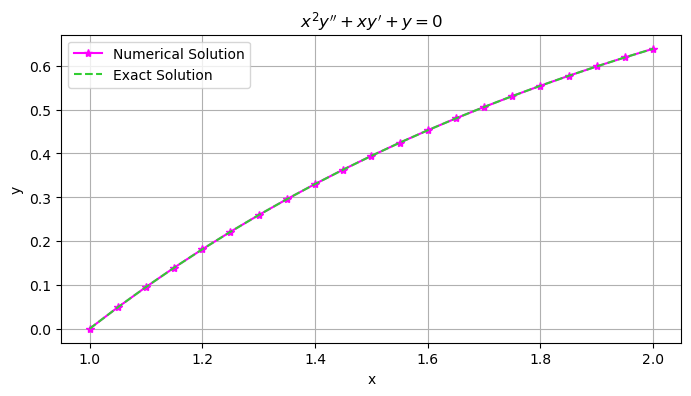

In [109]:
## SUBSTITUTION METHOD FOR USING `solve_bvp` GIVEN AN EXACT SOLUTION

# Set up the mesh
m = 20                         # number of mesh spaces
x = np.linspace(1.0, 2.0,      # a <= x <= b
                m+1)
y = np.zeros((2, x.size))      # solution vector holds y & y'
print(f'\nEnter the number of mesh points ==>  {m}')

# Discretize the differential equation
def fun(x,y): 
    dydx = y[1]                       # y' = y'
    dzdx = -(x*y[1] + y[0]) / x**2    # y'' = -(xy'+y)/x^2
    return np.vstack([dydx, dzdx])    # rewriting y'' as y'

# Implement the boundary conditions
def bc(ya, yb): return np.array([ya[0] - 0.00,   # y(a) == α
                                 yb[0] - 0.638961])  # y(b) == ß

sol = solve_bvp(fun, bc, x, y)
sol_x, sol_y = sol.x, sol.y[0,:]

# The exact solution
def f(x): return np.sin(np.log(x))
exact_y = f(x)

## FIND THE SOLUTION
for i in range(m + 1): exact_y[i] = f(x[i])
print("\n   x      |   Num Solution (sp)   |   Exact Solution")
print("--------------------------------------------------------")
for i in range(m+1):
    print('{:5.2f}'.format(x[i]),'{:20.4f}'.format(sol_y[i]),'{:18.4f}'.format(exact_y[i]))
print()

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(sol_x, sol_y, '*-', label='Numerical Solution', color='magenta')
plt.plot(x, exact_y, '--', label='Exact Solution', color='limegreen')
plt.title(r'$x^2 y^{\prime\prime} + xy^{\prime} + y = 0$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show();

---
<center><h2>Question 9</h2></center>

Solve the given boundary value problem with the finite difference method using $m=20$.
$$
\begin{align*}
y'' = y^2 sin y \\
y'(0) = 0 \\
y(\pi) = 1 \\
\end{align*}
$$
<br><br>


Enter the number of mesh points ==>  20

   x      |   Num Solution (sp)
------------------------------------
 0.00               0.4131
 0.16               0.4133
 0.31               0.4139
 0.47               0.4150
 0.63               0.4165
 0.79               0.4184
 0.94               0.4207
 1.10               0.4235
 1.26               0.4268
 1.41               0.4305
 1.57               0.4347
 1.73               0.4394
 1.88               0.4446
 2.04               0.4504
 2.20               0.4566
 2.36               0.4635
 2.51               0.4709
 2.67               0.4876
 2.83               0.5072
 2.98               0.5298
 3.14               0.5559



C:\Users\beanl\AppData\Local\Temp\ipykernel_28584\2895689471.py:23: RuntimeWarning: divide by zero encountered in log
  def f(x): return np.sin(np.log(x))
C:\Users\beanl\AppData\Local\Temp\ipykernel_28584\2895689471.py:23: RuntimeWarning: invalid value encountered in sin
  def f(x): return np.sin(np.log(x))


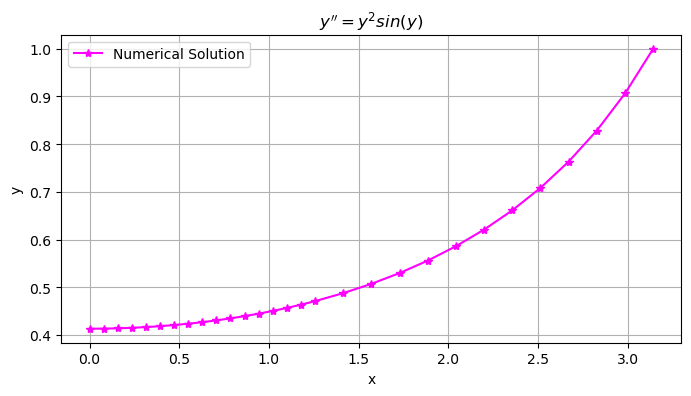

In [108]:
## SUBSTITUTION METHOD FOR USING `solve_bvp` & INITIAL GUESS
# Set up the mesh
m = 20                         # number of mesh spaces
x = np.linspace(0.0, np.pi,    # a <= x <= b
                m+1)
y = np.zeros((2, x.size))      # solution vector holds y & y'
print(f'\nEnter the number of mesh points ==>  {m}')

# Discretize the differential equation
def fun(x,y): 
    dydx = y[1]                       # y' = y'
    dzdx = y[0]**2 * np.sin(y[0])     # y'' = y^2 sin(y)
    return np.vstack([dydx, dzdx])    # rewriting y'' as y'

# Implement the boundary conditions
def bc(ya, yb): return np.array([ya[1] - 0.00,   # y'(a) == α
                                 yb[0] - 1.00])  # y(b) == ß

# Initial guess
y[0] = np.linspace(0, 1, x.size)

## FIND THE SOLUTION
sol = solve_bvp(fun, bc, x, y)
sol_x, sol_y = sol.x, sol.y[0,:]

# Print the results
for i in range(m + 1): exact_y[i] = f(x[i])
print("\n   x      |   Num Solution (sp)")
print("------------------------------------")
for i in range(m+1):
    print('{:5.2f}'.format(x[i]),'{:20.4f}'.format(sol_y[i]))
print()

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(sol_x, sol_y, '*-', label='Numerical Solution', color='magenta')
plt.title(r'$y^{\prime\prime} = y^2 sin(y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show();

--- 
--- 

<center><h2>Thank you!</h2></center><br><br>

<center>
<hr style="width: 50%; border-color: black;">
</center>